In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split

from sklearn import datasets
from djinn import djinn
print(sklearn.__version__)

Instructions for updating:
non-resource variables are not supported in the long term
1.0.2


In [ ]:
''' 
    NOTE: for the boston housing data you can expect test 
    MSE~10-20, Mean Abs Err~3-4, Exp.Var.~0.8+
    when using get_hyperparameters() function
'''

#Load the data, split into training/testing groups
d=datasets.load_boston()
X=d.data
Y=d.target

x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1) 

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [ ]:
print("djinn example")    
modelname="reg_djinn_test"   # name the model
ntrees=1                 # number of trees = number of neural nets in ensemble
maxdepth=4               # max depth of tree -- optimize this for each data set
dropout_keep=1.0         # dropout typically set to 1 for non-Bayesian models

#initialize the model
model=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)

# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
optimal=model.get_hyperparameters(x_train, y_train, random_state=1)
batchsize=optimal['batch_size']
learnrate=optimal['learn_rate']
epochs=optimal['epochs']


# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time

djinn example
Finding optimal hyper-parameters...
Determining learning rate...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Determining number of epochs needed...
Optimal learning rate:  0.007774912501771894
Optimal # epochs:  700
Optimal batch size:  21
Epoch: 0001 cost= 0.104205937
Epoch: 0002 cost= 0.037650561
Epoch: 0003 cost= 0.029013822
Epoch: 0004 cost= 0.019864748
Epoch: 0005 cost= 0.018570390
Epoch: 0006 cost= 0.018369789
Epoch: 0007 cost= 0.009928254
Epoch: 0008 cost= 0.012316634
Epoch: 0009 cost= 0.012211160
Epoch: 0010 cost= 0.007354730
Epoch: 0011 cost= 0.010307266
Epoch: 0012 cost= 0.009560233
Epoch: 0013 cost= 0.011411891
Epoch: 0014 cost= 0.008607377
Epoch: 0015 cost= 0.010533792
Epoch: 0016 cost= 0.008183392
Epoch: 0017 cost= 0.009738549
Epoch: 0018 cost= 0.006460698
Epoch: 0019 cost= 0.007376109
Epoch: 0020 cost= 0.008621277
Epoch: 0021 cost= 0.009145076
Epoch: 0022 cost= 0.005856672
Epoch: 0023 cos

In [ ]:
# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,m)
mabs=sklearn.metrics.mean_absolute_error(y_test,m)
exvar=sklearn.metrics.explained_variance_score(y_test,m)   
print('MSE',mse)
print('M Abs Err',mabs)
print('Expl. Var.',exvar)

#close model 
model.close_model()

INFO:tensorflow:Restoring parameters from ./reg_djinn_test_tree0.ckpt
Model 0 restored
MSE 7.717036957022651
M Abs Err 2.126033382789761
Expl. Var. 0.9260272125010668


In [ ]:
print("Reload model and continue training for 20 epochs")
# reload model; can also open it using cPickle.load()
model2=djinn.load(model_name="reg_djinn_test")

#continue training for 20 epochs using same learning rate, etc as before
model2.continue_training(x_train, y_train, 20, learnrate, batchsize, random_state=1)

#make updated predictions
m2=model2.predict(x_test)

#evaluate results
mse2=sklearn.metrics.mean_squared_error(y_test,m2)
mabs2=sklearn.metrics.mean_absolute_error(y_test,m2)
exvar2=sklearn.metrics.explained_variance_score(y_test,m2)   
print('MSE',mse2)
print('M Abs Err',mabs2)
print('Expl. Var.',exvar2)

Reload model and continue training for 20 epochs
INFO:tensorflow:Restoring parameters from ./reg_djinn_test_tree0.ckpt
Model 0 restored
INFO:tensorflow:Restoring parameters from ./reg_djinn_test_tree0.ckpt
Model 0 restored
Epoch: 0001 cost= 0.001878170
Epoch: 0002 cost= 0.001711261
Epoch: 0003 cost= 0.002183160
Epoch: 0004 cost= 0.001722249
Epoch: 0005 cost= 0.001740195
Epoch: 0006 cost= 0.001967351
Epoch: 0007 cost= 0.001487596
Epoch: 0008 cost= 0.002313387
Epoch: 0009 cost= 0.002600574
Epoch: 0010 cost= 0.003668663
Epoch: 0011 cost= 0.004320619
Epoch: 0012 cost= 0.002943699
Epoch: 0013 cost= 0.001943898
Epoch: 0014 cost= 0.002150355
Epoch: 0015 cost= 0.001702961
Epoch: 0016 cost= 0.001762613
Epoch: 0017 cost= 0.001720801
Epoch: 0018 cost= 0.001813433
Epoch: 0019 cost= 0.001627028
Epoch: 0020 cost= 0.001755282
Optimization Finished!
Model resaved in file: ./reg_djinn_test_tree0.ckpt
MSE 7.717036957022651
M Abs Err 2.126033382789761
Expl. Var. 0.9260272125010668


In [ ]:
# Bayesian formulation with dropout. Recommend dropout keep 
# probability ~0.95, 5-10 trees.
print("Bayesian djinn example")
ntrees=3
dropout_keep=0.95
modelname="reg_bdjinn_test"

# initialize a model
bmodel=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)

# "fit()" does what get_hyperparameters + train does, in one step: 
bmodel.fit(x_train,y_train, display_step=1, save_files=True, file_name=modelname, 
           save_model=True,model_name=modelname, random_state=1)

# evaluate: niters is the number of times you evaluate the network for 
# a single sample. higher niters = better resolved distribution of predictions
niters=100
bl,bm,bu,results=bmodel.bayesian_predict(x_test,n_iters=niters, random_state=1)
# bayesian_predict returns 25, 50, 75 percentile and results dict with all predictions

# evaluate performance on median predictions
mse=sklearn.metrics.mean_squared_error(y_test,bm)
mabs=sklearn.metrics.mean_absolute_error(y_test,bm)
exvar=sklearn.metrics.explained_variance_score(y_test,bm)   
print('MSE',mse)
print('M Abs Err',mabs)
print('Expl. Var.',exvar)

Bayesian djinn example
Finding optimal hyper-parameters...
Determining learning rate...
Determining number of epochs needed...
Optimal learning rate:  0.0054612805388816795
Optimal # epochs:  260
Optimal batch size:  21
Epoch: 0001 cost= 0.138441292
Epoch: 0002 cost= 0.054933402
Epoch: 0003 cost= 0.036948517
Epoch: 0004 cost= 0.030308262
Epoch: 0005 cost= 0.023454865
Epoch: 0006 cost= 0.021083400
Epoch: 0007 cost= 0.013955037
Epoch: 0008 cost= 0.017096110
Epoch: 0009 cost= 0.015055824
Epoch: 0010 cost= 0.010870386
Epoch: 0011 cost= 0.015952024
Epoch: 0012 cost= 0.011460382
Epoch: 0013 cost= 0.014044723
Epoch: 0014 cost= 0.011243463
Epoch: 0015 cost= 0.015251754
Epoch: 0016 cost= 0.010173553
Epoch: 0017 cost= 0.011754112
Epoch: 0018 cost= 0.010966665
Epoch: 0019 cost= 0.010282416
Epoch: 0020 cost= 0.012269141
Epoch: 0021 cost= 0.009767999
Epoch: 0022 cost= 0.009265099
Epoch: 0023 cost= 0.011297477
Epoch: 0024 cost= 0.008088975
Epoch: 0025 cost= 0.011850130
Epoch: 0026 cost= 0.010013392


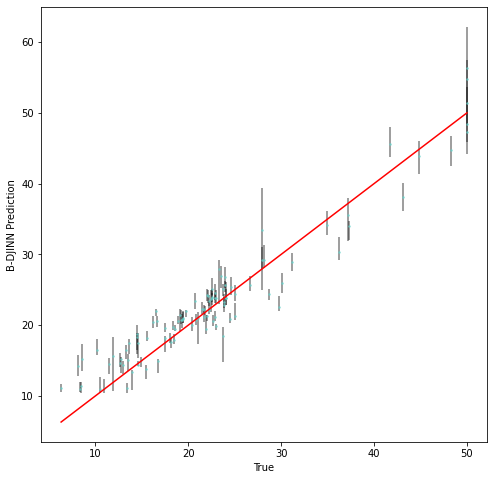

In [ ]:
# make a pretty plot

g=np.linspace(np.min(y_test),np.max(y_test),10)    
fig, axs = plt.subplots(1,1, figsize=(8,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .15, wspace=.1)
sc=axs.scatter(y_test, bm[:,0], linewidth=0,s=6, 
                  alpha=0.8, c='#68d1ca')
a,b,c=axs.errorbar(y_test, bm[:,0], yerr=[bm[:,0]-bl[:,0],bu[:,0]-bm[:,0]], marker='',ls='',zorder=0, 
                   alpha=0.5, ecolor='black')
axs.set_xlabel("True")
axs.set_ylabel("B-DJINN Prediction")    
axs.plot(g,g,color='red')
plt.show()

In [ ]:
# collect_tree_predictions gathers predictions in results dict
# in a more intuitive way for easy plotting, etc
p=bmodel.collect_tree_predictions(results['predictions'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=de072003-a9db-4342-8067-19a4b45feff1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>